In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv',
                index_col = 0)

df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [3]:
# Clean data
# Calculate the threshold values
top_threshold = df['value'].quantile(0.975) # top 2.5%
bottom_threshold = df['value'].quantile(0.025) # bottom 2.5%

# Filter out the rows outside the thresholds
df = df[(df['value'] > bottom_threshold) & (df['value'] < top_threshold)]

df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [4]:
# Convert the index to datetime
df.index = pd.to_datetime(df.index)

df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


DRAW LINE PLOT

(array([16892., 17075., 17257., 17440., 17622., 17805., 17987., 18170.]),
 [Text(16892.0, 0, '2016-04'),
  Text(17075.0, 0, '2016-10'),
  Text(17257.0, 0, '2017-04'),
  Text(17440.0, 0, '2017-10'),
  Text(17622.0, 0, '2018-04'),
  Text(17805.0, 0, '2018-10'),
  Text(17987.0, 0, '2019-04'),
  Text(18170.0, 0, '2019-10')])

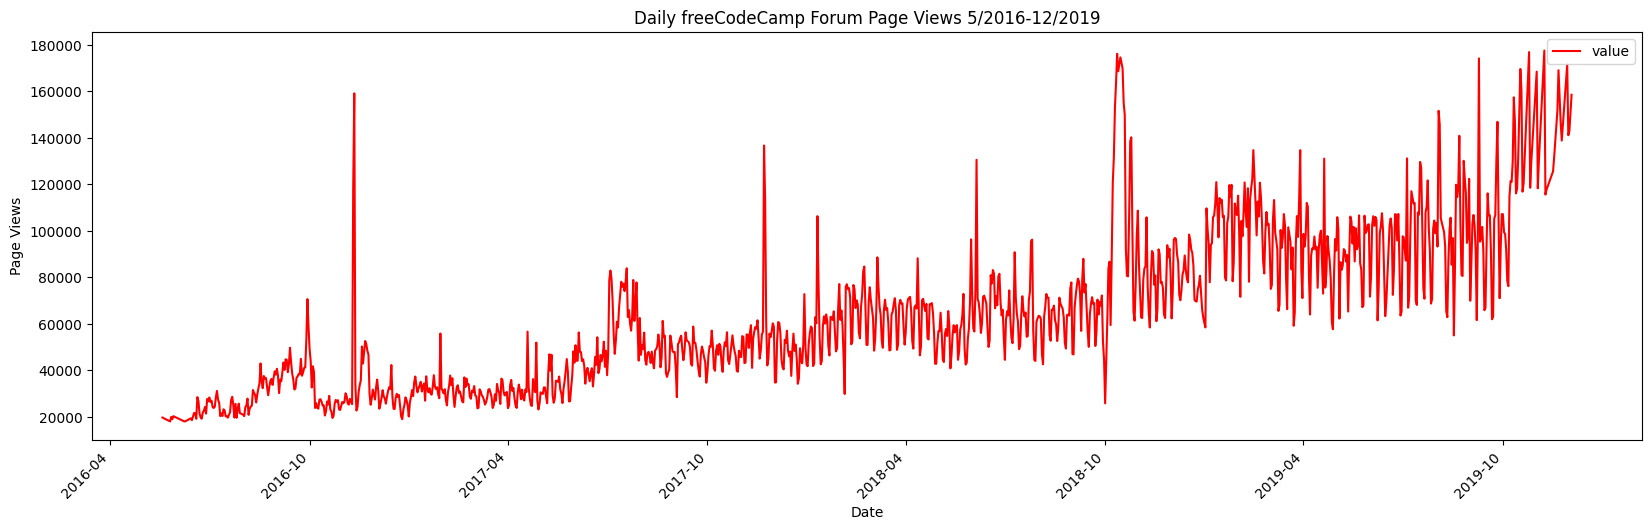

In [5]:
# Plot the data
fig, axis = plt.subplots(figsize=(20, 6))
df.plot(kind='line', color='red', ax=axis)

# Set title and labels
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

# Set x-axis ticker locator for 6-month intervals
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

DRAW BARPLOT

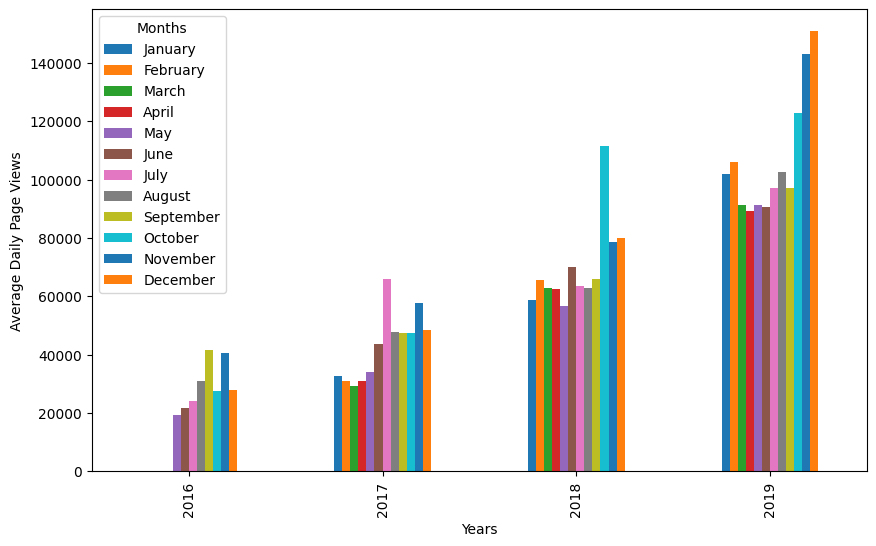

In [6]:
 monthly_avg_views = df.resample('M').mean()

# Group the data by month and year
monthly_avg_views['Year'] = monthly_avg_views.index.year
monthly_avg_views['Month'] = monthly_avg_views.index.month
monthly_avg_views_grouped = monthly_avg_views.groupby(['Year', 'Month']).mean()

# Copy and modify data for monthly bar plot
df_bar = monthly_avg_views_grouped.unstack()

import calendar
# Convert month numbers to month names and remove the 'value' part
df_bar.columns = [calendar.month_name[label[1]] for label in df_bar.columns]

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
df_bar.plot(kind='bar', ax=ax)

# Set the x-axis label
plt.xlabel('Years')

# Set the y-axis label
plt.ylabel('Average Daily Page Views')

# Set the legend title
plt.legend(title='Months')

DRAW BOX PLOT

C:\Users\OSEWUIKE DANIEL IGUE\AppData\Local\Temp\ipykernel_10296\2752629859.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(month_labels)


[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

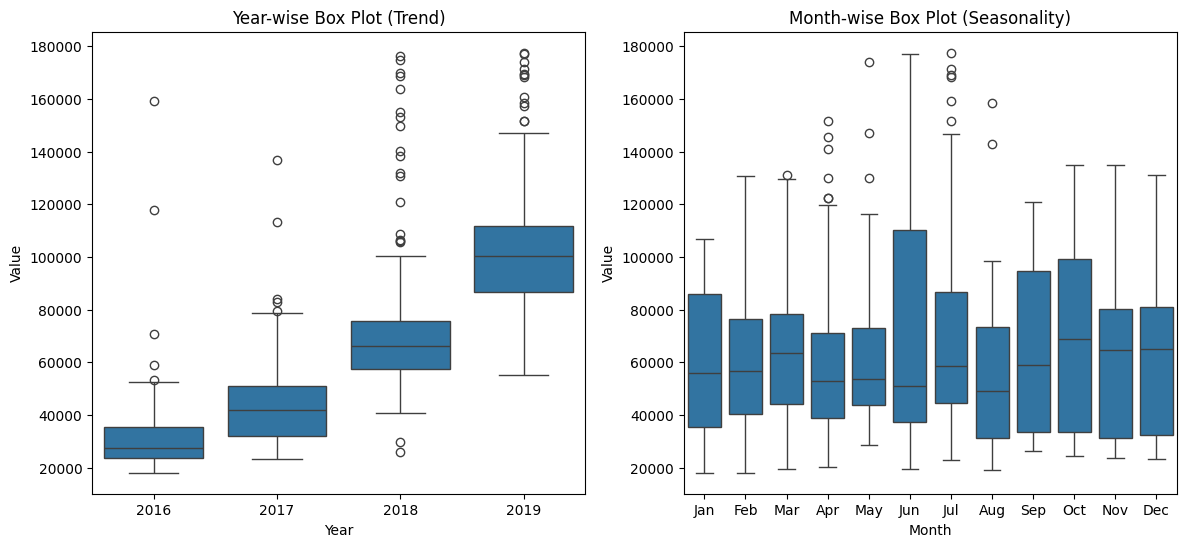

In [7]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Year-wise Box Plot (Trend)
sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Value')

# Plot for Month-wise Box Plot (Seasonality)
sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Value')

# Adjust the x-axis tick labels for the month-wise plot
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1].set_xticklabels(month_labels)